#### Cubic Grids

Grid offers two classes for constructing Hyper-rectangular grids in three-dimensions:

- [Tensor1DGrids](../pyapi/grid.cubic.rst#grid.cubic.Tensor1DGrids) : Tensor product of three one-dimensional grids.
- [UniformGrid](../pyapi/grid.cubic.rst#grid.cubic.UniformGrid) : Evenly spaced grid in three axes.

See their API documentation for more information about the classes.

##### Tensor 1D Grids
The first grid is a tensor combination of three grids with points $\{p^1_i\}, \{p^2_i\}, \{p^3_i\}$ and weights $\{w^1_i\}, \{w^2_i\}, \{w^3_i\}$ such that the new set of points are $\{(p^1_i, p^2_j, p^3_k)\}$ with weights $\{w^1_i \times w^2_j \times w^3_k\}$.

In [1]:
%matplotlib inline
from grid.onedgrid import UniformInteger
from grid.rtransform import LinearInfiniteRTransform
from grid.cubic import Tensor1DGrids
import numpy as np

# Construct a grid between -1 and 1 on the real line.
npoints = 25
onedgridx = UniformInteger(npoints)
onedgridx = LinearInfiniteRTransform(-1, 1).transform_1d_grid(onedgridx)

# Construct another grid between -0.5 and 0.5 on the real line
npoints = 15
onedgridy = UniformInteger(npoints)
onedgridy = LinearInfiniteRTransform(-1, 1).transform_1d_grid(onedgridy)

# Construct another grid between -0.25 and 0.25 on the real line
npoints = 10
onedgridz = UniformInteger(npoints)
onedgridz = LinearInfiniteRTransform(-1, 1).transform_1d_grid(onedgridz)

Each of the individual grids axes are plotted.

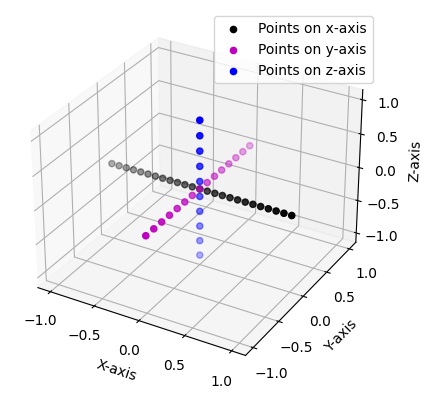

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(onedgridx.points, [0] *  len(onedgridx.points), [0] *  len(onedgridx.points), color="k", label="Points on x-axis")
ax.scatter( [0] *  len(onedgridy.points), onedgridy.points, [0] *  len(onedgridy.points), color="m", label="Points on y-axis")
ax.scatter( [0] *  len(onedgridz.points), [0] *  len(onedgridz.points), onedgridz.points , color="b", label="Points on z-axis")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()


The Tensor1DGrids can now be easily constructed by passing in each of the three one-dimensional grids.  These are then plotted

No handles with labels found to put in legend.


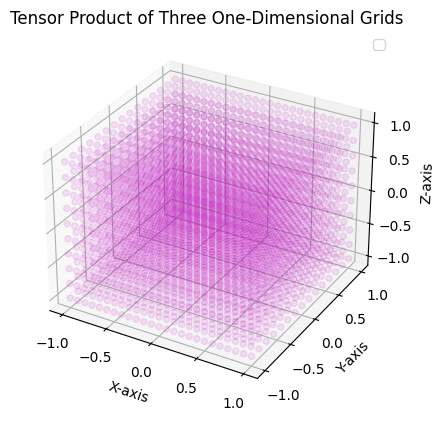

Points of the grid: [[-1.         -1.         -1.        ]
 [-1.         -1.         -0.77777778]
 [-1.         -1.         -0.55555556]
 ...
 [ 1.          1.          0.55555556]
 [ 1.          1.          0.77777778]
 [ 1.          1.          1.        ]]
Weights of the grid: [0.0026455 0.0026455 0.0026455 ... 0.0026455 0.0026455 0.0026455].
The number of points: 3750
The number of dimensions: 3.
The origin of the grid: [-1. -1. -1.].
The shape of the grid: (25, 15, 10).
Coordinate of the fifth point: (0, 0, 5).
Index of the (0, 0, 5) coordinate: 5.


In [3]:
# Constructing the tensor product grid.
tensor_grid = Tensor1DGrids(onedgridx, onedgridy, onedgridz)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(tensor_grid.points[:, 0], tensor_grid.points[:, 1], tensor_grid.points[:, 2], color="m", alpha=0.1)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.title("Tensor Product of Three One-Dimensional Grids")
plt.show()

print(f"Points of the grid: {tensor_grid.points}")
print(f"Weights of the grid: {tensor_grid.weights}.")
print(f"The number of points: {tensor_grid.size}")
print(f"The number of dimensions: {tensor_grid.ndim}.")
print(f"The origin of the grid: {tensor_grid.origin}.")
print(f"The shape of the grid: {tensor_grid.shape}.")

# Can integrate functions on it
#func_vals = # insert function here
#integral = tensor_grid.integrate(func_vals)

# Conversion from indices i to coordinates (i, j, k) to points
coordinate = tensor_grid.index_to_coordinates(5)
print(f"Coordinate of the fifth point: {coordinate}.")
index = tensor_grid.coordinates_to_index((0, 0, 5))
print(f"Index of the (0, 0, 5) coordinate: {index}.")

### Interpolation
This example will attempt to interpolate a Gaussian, first on a subset of the points used for interpolation then later on random set of points.

In [4]:
# Interpolation of a Gaussian
gaussian = lambda pts: np.exp(-3.0 * np.linalg.norm(pts, axis=1)**2.0)
gaus_vals = gaussian(tensor_grid.points)

# Interpolation evaluated on subset of the same points used for interpolation
subset = tensor_grid.points[np.random.choice(range(tensor_grid.size), 10)]
true_vals = gaussian(subset)

print("Interpolate using linear method.")
interpol = tensor_grid.interpolate(subset, gaus_vals, use_log=False, method="linear")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")

print("Interpolate using linear method applying the logarithm.")
interpol = tensor_grid.interpolate(subset, gaus_vals, use_log=True, method="linear")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")

print("Interpolate using cubic splines")
interpol = tensor_grid.interpolate(subset, gaus_vals, use_log=False, method="cubic")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")

print("Inteprolate using cubic splines appling the logarithm")
interpol = tensor_grid.interpolate(subset, gaus_vals, use_log=True, method="cubic")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")


Interpolate using linear method.
The errors are:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Maximum error is 0.0 

Interpolate using linear method applying the logarithm.
The errors are:  [3.193657   2.73140349 3.12648027 4.0888995  5.15038888 1.17760791
 2.6164855  4.46085684 2.92740481 2.14224285]
Maximum error is 5.150388875279692 

Interpolate using cubic splines
The errors are:  [7.93544637e-03 1.38777878e-17 0.00000000e+00 3.91153506e-02
 3.71161462e-02 0.00000000e+00 0.00000000e+00 1.73472348e-18
 0.00000000e+00 0.00000000e+00]
Maximum error is 0.03911535059395724 

Inteprolate using cubic splines appling the logarithm
The errors are:  [3.46944695e-17 4.16333634e-17 0.00000000e+00 1.38777878e-17
 9.28077060e-17 0.00000000e+00 0.00000000e+00 1.04083409e-17
 0.00000000e+00 0.00000000e+00]
Maximum error is 9.280770596475918e-17 



In [5]:
# Interpolate at random set of points
random_pts = np.random.uniform(-1, 1, (25, 3))
true_vals = gaussian(random_pts)

print("Interpolate using linear method.")
interpol = tensor_grid.interpolate(random_pts, gaus_vals, use_log=False, method="linear")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")
# The logarithm is first applied to the Gaussian functions to be easier to interpolate at.
print("Interpolate using linear method applying the logarithm.")
interpol = tensor_grid.interpolate(random_pts, gaus_vals, use_log=True, method="linear")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")
# Rather then interpolate using linearly, this used the cubic
print("Interpolate using cubic splines")
interpol = tensor_grid.interpolate(random_pts, gaus_vals, use_log=False, method="cubic")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")
# Same as above but the logarithm is applied.
print("Inteprolate using cubic splines appling the logarithm")
interpol = tensor_grid.interpolate(random_pts, gaus_vals, use_log=True, method="cubic")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")


Interpolate using linear method.
The errors are:  [6.86173876e-03 2.26427272e-03 2.75414631e-03 8.31728378e-04
 3.36204251e-04 1.02072667e-03 1.10210049e-03 8.64501631e-03
 2.59512329e-03 2.37728933e-02 7.91657412e-03 5.70279923e-04
 8.17962022e-05 1.00837863e-03 4.85942116e-04 2.44078257e-03
 1.23119491e-03 3.24114061e-03 8.79283200e-05 4.75430397e-04
 9.07759875e-03 3.06864518e-03 2.14220561e-03 1.70213035e-02
 5.44407520e-03]
Maximum error is 0.023772893292459685 

Interpolate using linear method applying the logarithm.
The errors are:  [1.05334441 2.35743704 2.76240336 5.30551986 3.77712127 4.66217629
 1.35942007 1.59072927 4.05482905 1.12249552 2.28187585 5.73517397
 3.4362982  1.87187658 3.77764034 2.69709785 3.40070745 1.90818364
 3.75722379 5.45525854 2.03052493 2.27263171 3.11819061 1.18778426
 1.64987246]
Maximum error is 5.735173965540577 

Interpolate using cubic splines
The errors are:  [2.24391131e-05 9.23295650e-05 2.05774450e-03 2.86880928e-03
 5.90844251e-03 6.90406116

In [6]:
# Derivative can be interpolated
# X-derivative
deriv_x = tensor_grid.interpolate(random_pts, gaus_vals, use_log=False, nu_x=1, nu_y=0, nu_z=0, method="cubic")
print(f"Derivative in x-direction {deriv_x}.")
# Y-derivative
deriv_y = tensor_grid.interpolate(random_pts, gaus_vals, use_log=False, nu_x=0, nu_y=1, nu_z=0, method="cubic")
# Z-derivative
deriv_z = tensor_grid.interpolate(random_pts, gaus_vals, use_log=False, nu_x=0, nu_y=0, nu_z=1, method="cubic")
# XY- derivative
deriv_xy = tensor_grid.interpolate(random_pts, gaus_vals, use_log=False, nu_x=1, nu_y=1, nu_z=0, method="cubic")
# The logarithm can be used to interpolate derivatives on single points only (mixed derivative are not supported)
derivs = []
for pt in random_pts:
    deriv_x = tensor_grid.interpolate(np.array([pt]), gaus_vals, use_log=True, nu_x=1, nu_y=0, nu_z=0, method="cubic")
    derivs.append(deriv_x[0])
print(f"Derivative (using logarithm) in x-direction {np.array(derivs)}.")

Derivative in x-direction [ 0.5624684  -0.20330985 -0.16864102 -0.03734494  0.07970672  0.05186396
  0.34235791  0.14498176 -0.12459229  0.63700915  0.0117608  -0.04356053
 -0.15437839 -0.04068863  0.13449481 -0.19856986 -0.11815679  0.12573653
 -0.11598643  0.02723251  0.14342847  0.02407911  0.27687625  0.47523628
 -0.31931175].
Derivative (using logarithm) in x-direction [ 0.56248734 -0.20347957 -0.16380904 -0.03028918  0.06421742  0.04853431
  0.34250822  0.14613648 -0.07047402  0.63771614  0.0118858  -0.01986379
 -0.20530633 -0.04050378  0.13442416 -0.19776845 -0.11585667  0.12604302
 -0.10288114  0.02637698  0.13490876  0.02404968  0.29198534  0.47578599
 -0.31947902].


##### Uniform Grid

This is type of cubic grid (a.k.a. rectilinear grid) with evenly-spaced points in each axes.  It supports the same properties and functions as Tensor1DGrids.  The easiest method to construct a uniform grid for the purposes of chemistry is the "from_molecule" method.  This example will showcase this for Formaldehyde molecule.

No handles with labels found to put in legend.


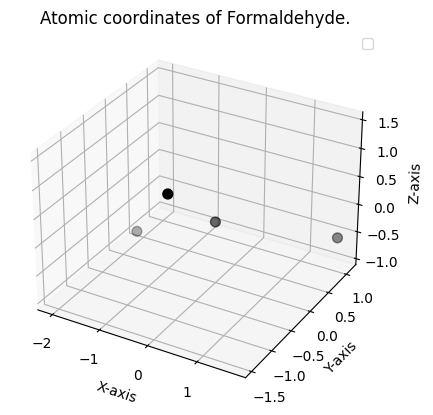

In [7]:
from scipy.stats import special_ortho_group

# Coordinates of the ch2o molecule on the xy-axis
coordinates = np.array([
   [2.27823914E+00,  4.13899085E-07,  3.12033662E-07],
   [1.01154892E-02,  1.09802629E-07, -6.99333116E-07],
   [-1.09577141E+00,  1.77311416E+00,  1.42544321E-07],
   [-1.09577166E+00, -1.77311468E+00,  2.44755133E-07]
])
# Rotate them
rot = special_ortho_group.rvs(3)
coordinates = coordinates.dot(rot)
charges = np.array([8, 6, 1, 1])


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], color="k", s=50)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.title("Atomic coordinates of Formaldehyde.")
plt.show()


No handles with labels found to put in legend.


The number of points: 4788
The number of dimensions: 3.
The shape of the grid: [18 19 14].
The origin of the grid: [-7.89714547 -4.63767195 -7.6123223 ].
The axes of the grid: [[ 0.67197732  0.29799576 -0.14881198]
 [-0.12707384  0.5390871   0.50570479]
 [ 0.307894   -0.42788272  0.5334957 ]].


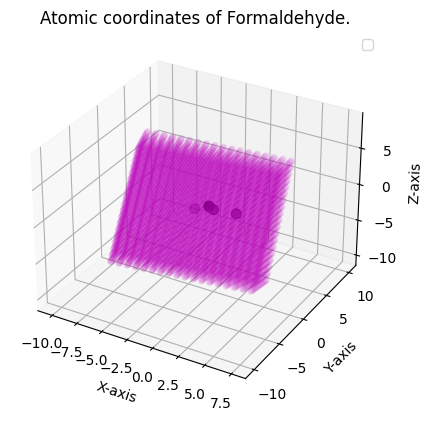

In [8]:
from grid.cubic import UniformGrid

uniform_grid = UniformGrid.from_molecule(
    charges, coordinates, spacing=0.75, extension=5.0, rotate=True
)

print(f"The number of points: {uniform_grid.size}")
print(f"The number of dimensions: {uniform_grid.ndim}.")
print(f"The shape of the grid: {uniform_grid.shape}.")
print(f"The origin of the grid: {uniform_grid.origin}.")
print(f"The axes of the grid: {uniform_grid.axes}.")


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], color="k", s=50)
ax.scatter(uniform_grid.points[:, 0], uniform_grid.points[:, 1], uniform_grid.points[:, 2], color="m", alpha=0.1)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.title("Atomic coordinates of Formaldehyde.")
plt.show()